文件的编码格式:utf-8
序号   词语      频率   
1    自我          4
2    过度          4
3    敏感          4
4    焦虑          3
5    自我怀疑        3
6    纠结          2
7    精神状态        2
8    自我否定        2
9    胡思乱想        1
10   发疯          1
11   情绪          1
12   反噬          1
13   浮想联翩        1
14   心理内耗        1
15   pua         1
16   不好          1
17   状态          1
18   心事          1
19   迷失          1
20   后悔          1
21   担心          1
22   揣测          1
23   防御性         1
24   悲观          1
25   反刍          1
26   行为          1
27   无用          1
28   多思          1
29   沉湎          1
30   虚幻          1


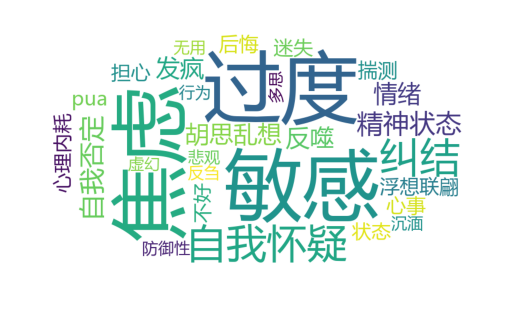

In [18]:
import  jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np 

f = open('分析文档.txt', 'r' ,encoding='utf-8'  ) #读取文档
print('文件的编码格式:'+f.encoding)
exclude={'由于','感到','因为','对于','比如','导致','没有','自我','他人','自己'} #去掉的词
txt = f.read()
f.close()
add_words = ['自我否定', '自我怀疑', '心理内耗'] #添加的词
for word in add_words:
    jieba.add_word(word)
words = jieba.lcut(txt)
counts = {}     
chiyun = []
for word in words:
    if  len(word) < 2 :  
        continue
    else:
        counts[word] = counts.get(word, 0) + 1

items = list(counts.items())
items.sort(key=lambda x: x[1], reverse=True)

print("{0:<5}{1:<8}{2:<5}".format('序号','词语', '频率'))


#需要显示的范围  10即显示前10个，0到9
for i in range(30):
    word, count = items[i]
    print("{0:<5}{1:<8}{2:>5}".format(i+1,word, count))
    chiyun.append(word)

#加载图片信息
maskph = np.array(Image.open('词频背景.jpg')) #使用的背景

#join 函数 用斜杆拼接词组
text_cut  =  '/'.join(chiyun)
wordcloud = WordCloud(mask =maskph,  background_color='white',font_path = 'msyh.ttc', width=1000, height=860, margin=2,stopwords=exclude).generate(text_cut)
# 显示图片 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()